In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from tqdm import tqdm
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from solat_cb.simulation import *
from solat_cb.spectra import *
from solat_cb.mle import *

In [38]:
libdir ='/pscratch/sd/l/lonappan/SOLAT'
nside = 1024
cb_method = 'iso'
beta = 0.35
dust = 10
synch = 5
alpha = [-0.1,-0.1,0.2,0.2,.15,.15]
atm_noise = False
nsplits = 2
bandpass = False
fit = "As + Asd + Ad + beta + alpha"
binwidth = 20
bmin = 60
bmax = 2000

In [39]:
lat = LATsky(libdir,nside,cb_method,dust,synch,alpha,beta,atm_noise=atm_noise,nsplits=nsplits,bandpass=bandpass)

CMB : INFO - Loading CMB power spectra from file


Noise : INFO - Noise Model: White noise v3.0.0


In [40]:
spec = Spectra(lat,cache=True,parallel=0)

Spectra : INFO - Reading apodised mask from /pscratch/sd/l/lonappan/SOLAT/LAT_white_noise_2splits/spectra_1024_aposcale2p0_common/workspaces/mask_N1024_aposcale2p0_CO_PS.fits


Spectra : INFO - Reading coupling Matrix from /pscratch/sd/l/lonappan/SOLAT/LAT_white_noise_2splits/spectra_1024_aposcale2p0_common/workspaces/coupling_matrix_N1024_fsky0p55_aposcale2p0_CO_PS.fits
Spectra : INFO - No parallelization


In [41]:
ml = MLE(libdir,spec,fit, alpha_per_split=False,rm_same_tube=False,binwidth=binwidth,bmin=bmin,bmax=bmax)

CMB : INFO - Loading CMB power spectra from file


Fitting a common polarisation angle per frequency


In [55]:
beta = []
for i in range(100):
    beta.append(ml.estimate_angles(i)['225'])

In [56]:
np.mean(beta),np.std(beta)

(0.19323622376552685, 0.05648458761915107)

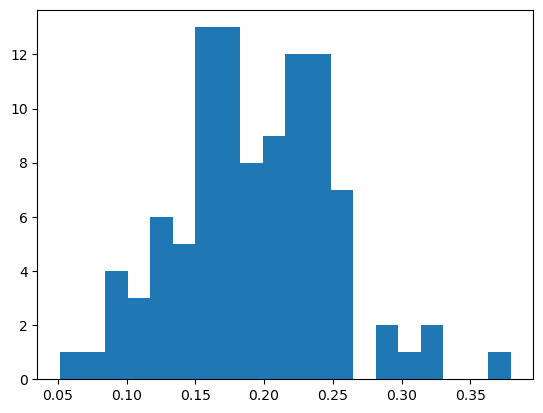

In [57]:
Null = plt.hist(beta,bins=20)